In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
train.head()

Train Shape: (15533, 18)
Test Shape: (5225, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

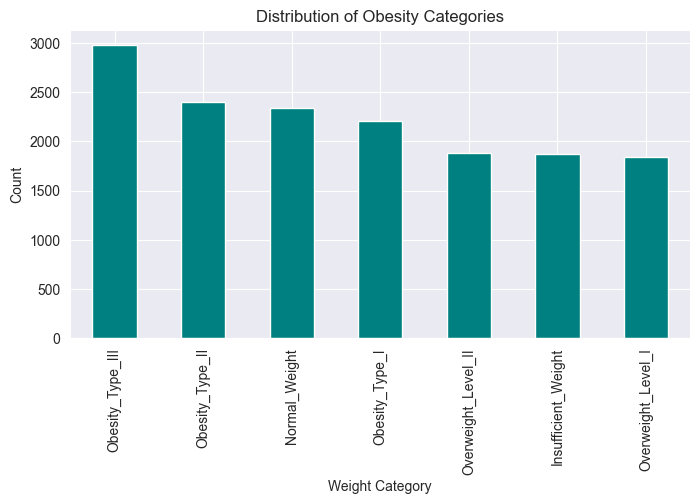

id        0
Gender    0
MTRANS    0
CALC      0
TUE       0
FAF       0
SCC       0
CH2O      0
SMOKE     0
CAEC      0
dtype: int64

In [5]:
print(train.info())
print(train.describe())

train.drop('id', axis=1)

plt.figure(figsize=(8,4))
train['WeightCategory'].value_counts().plot(kind='bar', color='teal')
plt.title("Distribution of Obesity Categories")
plt.xlabel("Weight Category")
plt.ylabel("Count")
plt.show()

train.isnull().sum().sort_values(ascending=False).head(10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC               

/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/3402292326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeightCategory', data=train, palette='viridis')


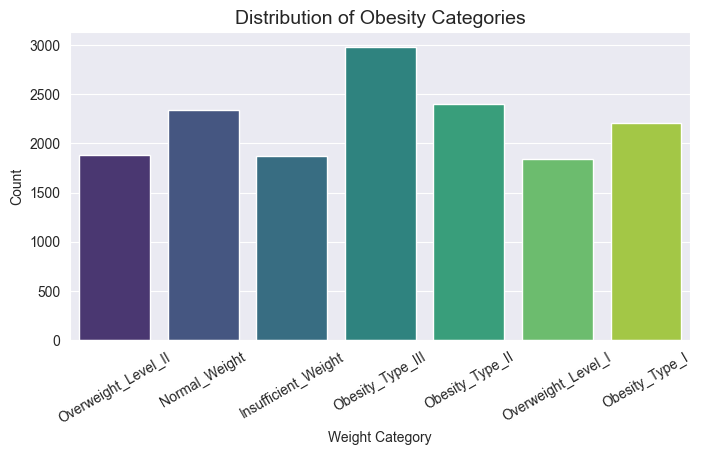

Missing Values (Top 10):
id        0
Gender    0
MTRANS    0
CALC      0
TUE       0
FAF       0
SCC       0
CH2O      0
SMOKE     0
CAEC      0
dtype: int64


In [6]:
print("Dataset Info:")
print(train.info())
print("Summary Statistics:")
print(train.describe())

plt.figure(figsize=(8,4))
sns.countplot(x='WeightCategory', data=train, palette='viridis')
plt.title("Distribution of Obesity Categories", fontsize=14)
plt.xlabel("Weight Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

missing = train.isnull().sum().sort_values(ascending=False)
print("Missing Values (Top 10):")
print(missing.head(10))


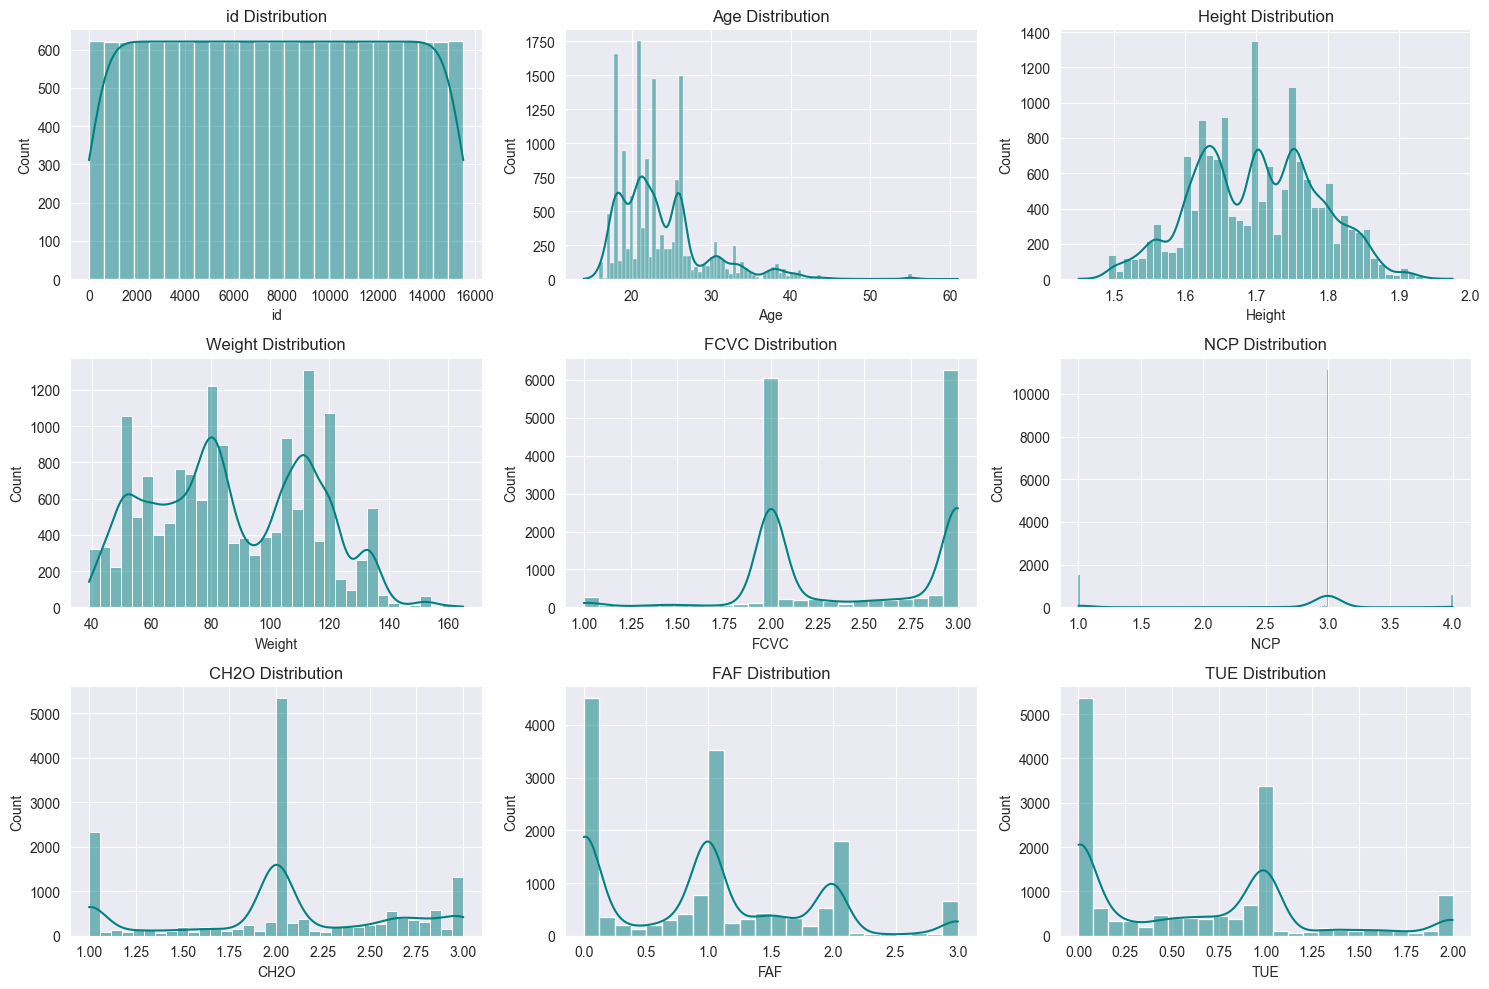

/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/674824936.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=col, data=train, palette='viridis')
/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/674824936.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=col, data=train, palette='viridis')
/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/674824936.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightCategory', y=col, data=train, palette=

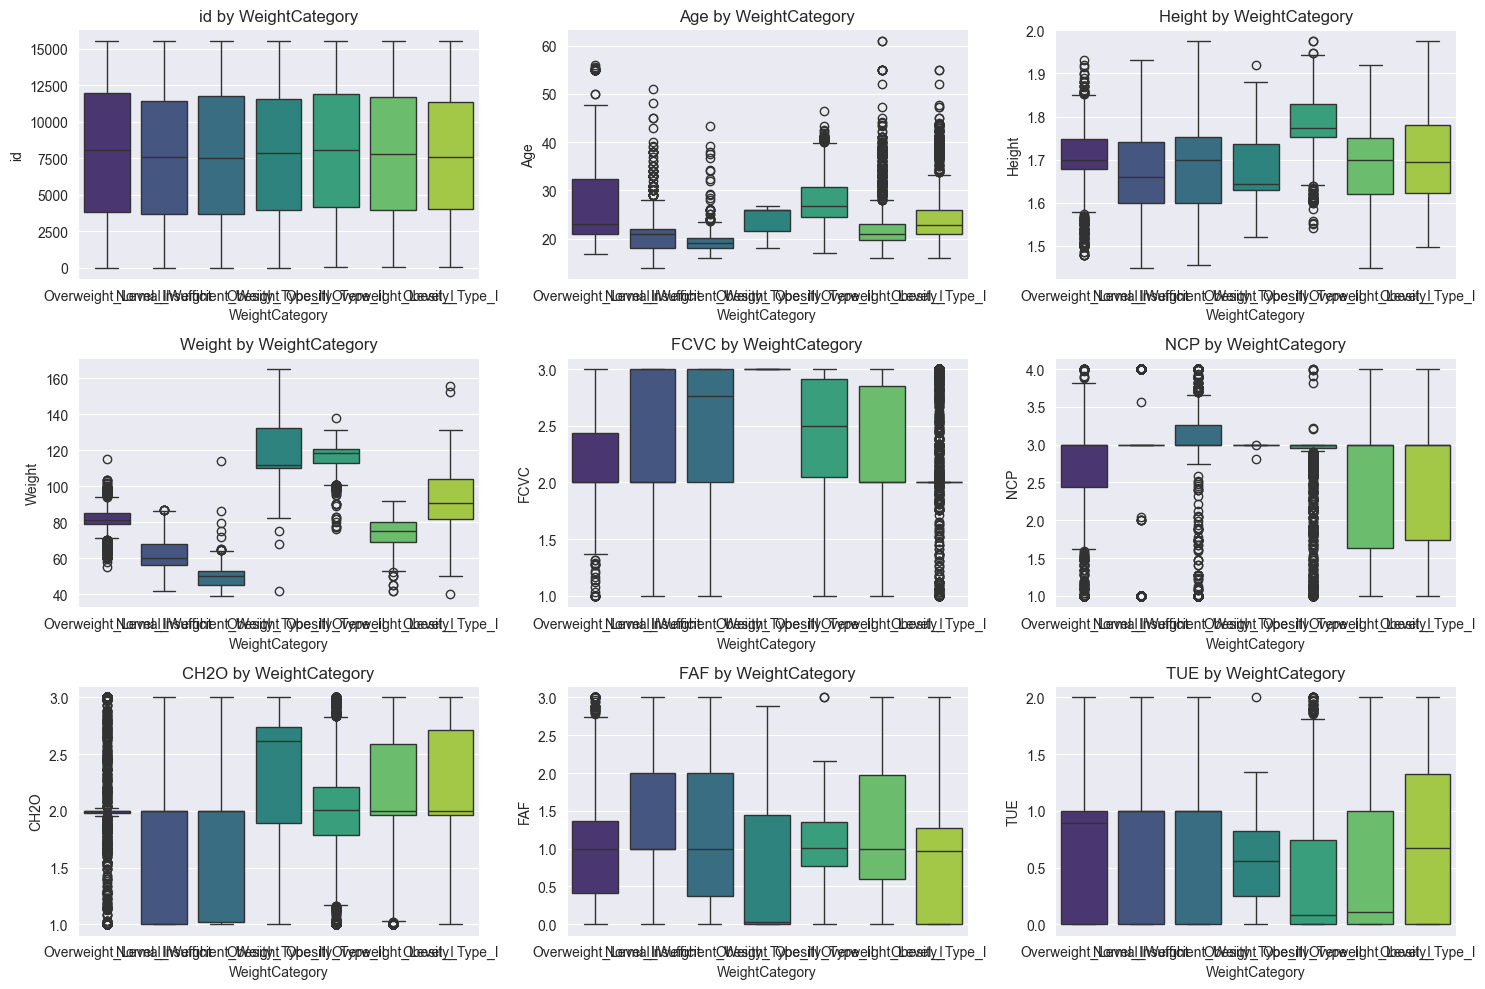

In [7]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(train[col], kde=True, color='teal')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='WeightCategory', y=col, data=train, palette='viridis')
    plt.title(f'{col} by WeightCategory')
plt.tight_layout()
plt.show()


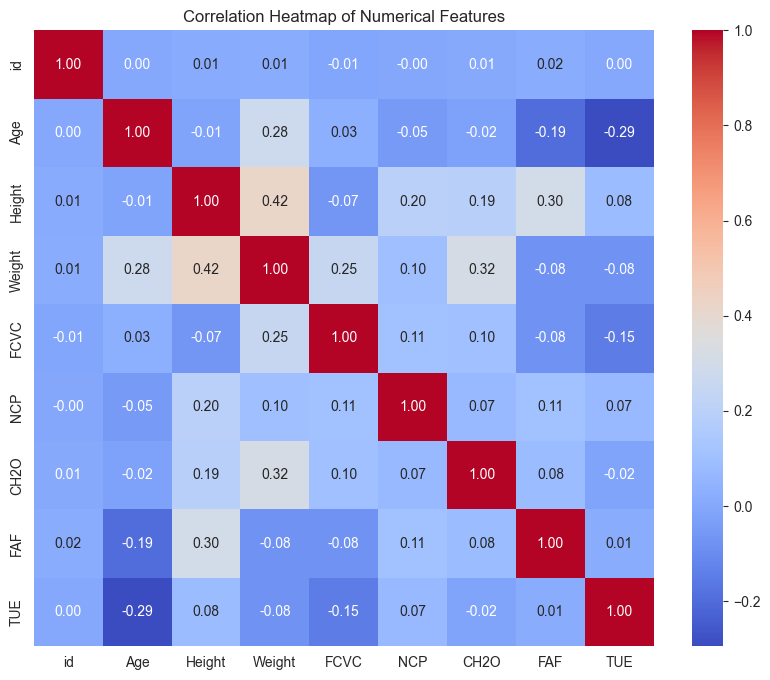

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/1722806728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_variance.index, y=feature_variance.values, palette='viridis')


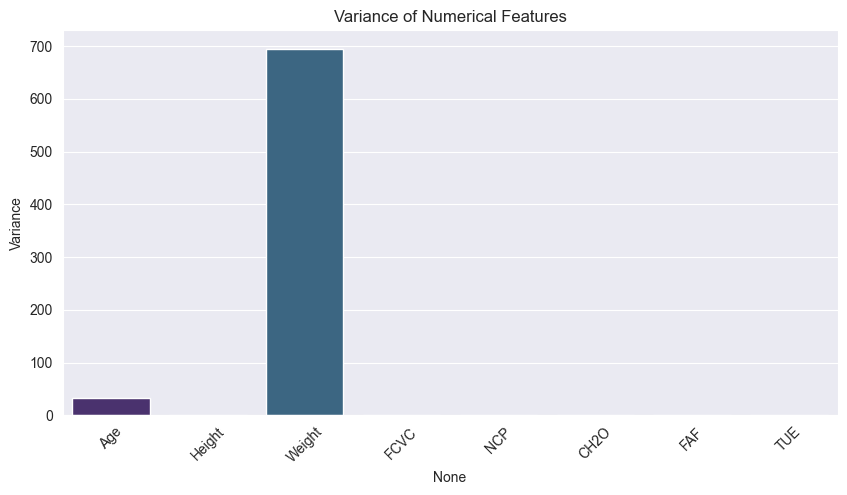

Variance of Numerical Features:
Age        32.071460
Height      0.007686
Weight    695.331767
FCVC        0.281849
NCP         0.499090
CH2O        0.369339
FAF         0.700303
TUE         0.362672
dtype: float64


In [9]:
num_cols_no_id = [col for col in num_cols if col != 'id']
feature_variance = train[num_cols_no_id].var()

plt.figure(figsize=(10,5))
sns.barplot(x=feature_variance.index, y=feature_variance.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Variance of Numerical Features")
plt.ylabel("Variance")
plt.show()

# Display variance values
print("Variance of Numerical Features:")
print(feature_variance)



/var/folders/xd/d00_98152z9cjnyqw6g2z45h0000gn/T/ipykernel_24584/662089277.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['Feature'], y=vif_data['VIF'], palette='magma')


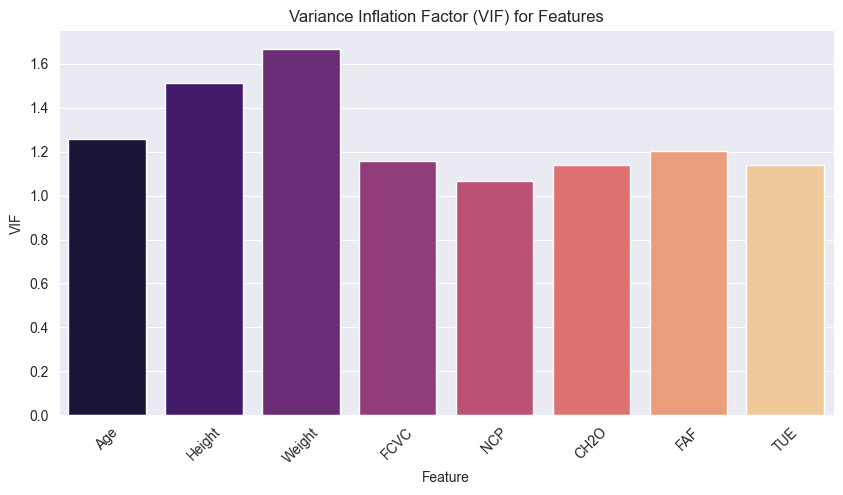

Variance Inflation Factor (VIF) for each feature:
  Feature       VIF
1     Age  1.255469
2  Height  1.514290
3  Weight  1.668757
4    FCVC  1.156427
5     NCP  1.067661
6    CH2O  1.139718
7     FAF  1.202007
8     TUE  1.139282


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

num_cols_no_id = [col for col in num_cols if col != 'id']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[num_cols_no_id])

X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols_no_id)
X_scaled_df_const = sm.add_constant(X_scaled_df)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled_df_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df_const.values, i)
                   for i in range(X_scaled_df_const.shape[1])]

vif_data = vif_data[vif_data['Feature'] != 'const']

plt.figure(figsize=(10,5))
sns.barplot(x=vif_data['Feature'], y=vif_data['VIF'], palette='magma')
plt.xticks(rotation=45)
plt.title("Variance Inflation Factor (VIF) for Features")
plt.ylabel("VIF")
plt.show()

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

In [11]:
X_train = train.drop(['id', 'WeightCategory'], axis=1)
y_train = train['WeightCategory']
X_test = test.drop(['id'], axis=1)

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

print("Data Cleaning Done")
print(f"Categorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical Columns ({len(num_cols)}): {num_cols}")

Data Cleaning Done
Categorical Columns (8): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numerical Columns (8): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [12]:
X_train_model, X_valid, y_train_model, y_valid = train_test_split(
    X_train, y_train_enc, test_size=0.2, stratify=y_train_enc, random_state=42
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        eval_metric='mlogloss', random_state=42, use_label_encoder=False
    )
}

results = []

for name, clf in models.items():
    print(f"\nTraining {name}...")

    model = Pipeline(steps=[
        ('classifier', clf)
    ])

    model.fit(X_train_model, y_train_model)
    preds = model.predict(X_valid)

    acc = accuracy_score(y_valid, preds)
    f1 = f1_score(y_valid, preds, average='macro')

    print(f"{name} Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_valid, preds))

    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\n****************************")
print("Model Comparison Results:")
print("****************************")
print(results_df)

/Users/uttkarsh/Documents/IIITB/T1-25-AIT511-MachineLearning/obesity_risk_prediction/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training Logistic Regression...
Logistic Regression Accuracy: 0.8600, F1 Score: 0.8453
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       374
           1       0.84      0.78      0.81       469
           2       0.83      0.83      0.83       441
           3       0.93      0.97      0.95       481
           4       0.99      1.00      0.99       597
           5       0.73      0.69      0.71       369
           6       0.75      0.72      0.73       376

    accuracy                           0.86      3107
   macro avg       0.84      0.85      0.85      3107
weighted avg       0.86      0.86      0.86      3107


Training Random Forest...
Random Forest Accuracy: 0.8915, F1 Score: 0.8805
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       374
           1       0.84      0.89      0.86       469
           2       0.89      0.85      0.87       441
           3       0.9

/Users/uttkarsh/Documents/IIITB/T1-25-AIT511-MachineLearning/obesity_risk_prediction/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [00:09:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9067, F1 Score: 0.8973
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       374
           1       0.89      0.90      0.89       469
           2       0.89      0.87      0.88       441
           3       0.96      0.97      0.96       481
           4       0.99      1.00      0.99       597
           5       0.82      0.76      0.79       369
           6       0.80      0.85      0.82       376

    accuracy                           0.91      3107
   macro avg       0.90      0.90      0.90      3107
weighted avg       0.91      0.91      0.91      3107


****************************
Model Comparison Results:
****************************
                 Model  Accuracy  F1 Score
3              XGBoost  0.906662  0.897311
2    Gradient Boosting  0.903122  0.893525
1        Random Forest  0.891535  0.880505
0  Logistic Regression  0.859994  0.845303


In [13]:
xgb = XGBClassifier(
    n_estimators=590,
    learning_rate=0.04771408889915993,
    max_depth=8,
    subsample=0.5337988433180236,
    colsample_bytree=0.4095606,
    min_child_weight=2,
    gamma=0.5906,
    reg_alpha=0.5,
    reg_lambda=2,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_jobs=-1
)

xgb.fit(X_train, y_train_enc)

y_pred = xgb.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred)


# Final Submission
submission = pd.DataFrame({
    'id': test['id'],
    'WeightCategory': y_pred_labels
})

submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")


/Users/uttkarsh/Documents/IIITB/T1-25-AIT511-MachineLearning/obesity_risk_prediction/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [00:09:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predictions saved to submission.csv
